# Introduction 

This is a publicly available dataset from Kaggle about the Goodreads book ratings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.listdir(r'C:\Users\tgord\MyPyScripts\input'))

['books.csv']


# Loading in the Data

In [2]:
df = pd.read_csv(r'C:\Users\tgord\MyPyScripts\input\books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [3]:
df.head()

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       3  Harry Potter and the Sorcerer's Stone (Harry P...   
3       4  Harry Potter and the Chamber of Secrets (Harry...   
4       5  Harry Potter and the Prisoner of Azkaban (Harr...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling-Mary GrandPré            4.56  0439785960  9780439785969   
1  J.K. Rowling-Mary GrandPré            4.49  0439358078  9780439358071   
2  J.K. Rowling-Mary GrandPré            4.47  0439554934  9780439554930   
3                J.K. Rowling            4.41  0439554896  9780439554893   
4  J.K. Rowling-Mary GrandPré            4.55  043965548X  9780439655484   

  language_code  # num_pages  ratings_count  text_reviews_count  
0           eng          652        1944099               26249  
1           eng          870        1996446               27613  
2           eng          320        5629932               70390  
3           eng          352           6267                 272  
4           eng          435        2149872               33964

In [4]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [5]:
df.bookID.nunique()

13714

bookID is unique for each entry, and is a good value to use as the index.

In [6]:
df.index = df['bookID']

# Understand the structure of Data

In [7]:
df.shape

(13714, 10)

In [8]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [9]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

There are no missing values which means we have minimal data cleaning to do. 

In [10]:
df.describe()

bookID  average_rating        isbn13   # num_pages  \
count  13714.000000    13714.000000  1.371400e+04  13714.000000   
mean   22159.859195        3.930620  9.764017e+12    342.402727   
std    13700.926816        0.357893  3.987679e+11    252.650165   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10619.250000        3.770000  9.780345e+12    196.000000   
50%    21321.500000        3.960000  9.780613e+12    301.000000   
75%    33311.750000        4.130000  9.780940e+12    421.000000   
max    47709.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
count   1.371400e+04        13714.000000  
mean    1.776540e+04          533.632128  
std     1.129572e+05         2529.006691  
min     0.000000e+00            0.000000  
25%     8.300000e+01            7.000000  
50%     6.305000e+02           40.000000  
75%     4.742250e+03          222.000000  
max     5.629932e+06        93619.000000

In [11]:
df.isbn13.nunique()

13714

I cut the ratings into bins to better visualize the distribution of the data in the following section

In [12]:
df['Rating_Category'] = pd.cut(df['average_rating'], 5)

# Understanding Data with Visualizations

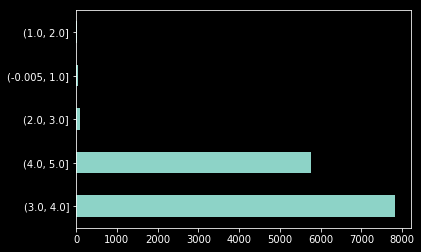

In [13]:
df['Rating_Category'].value_counts().plot(kind='barh')

In [14]:
df.authors.nunique()

7600

In [15]:
df.title.nunique()

12422

In [16]:
df.Rating_Category.value_counts(sort=False)

(-0.005, 1.0]      36
(1.0, 2.0]         11
(2.0, 3.0]         88
(3.0, 4.0]       7821
(4.0, 5.0]       5758
Name: Rating_Category, dtype: int64

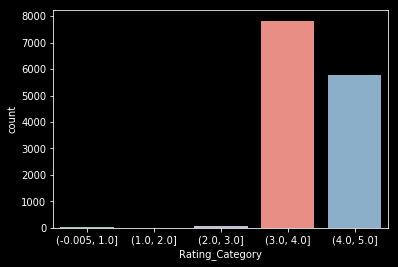

In [17]:
sns.countplot(df['Rating_Category'], orient="h")

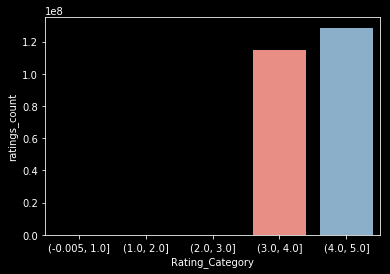

In [18]:
sns.barplot(x=df.Rating_Category, y=df.ratings_count, estimator=sum, ci=None)

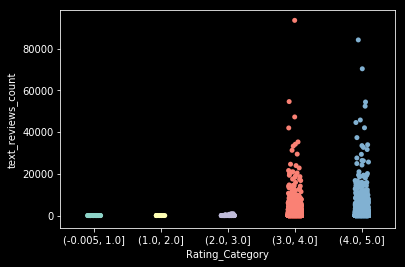

In [19]:
sns.stripplot(x=df.Rating_Category, y=df.text_reviews_count)

Text(0.5, 1.0, 'Most Popular Books Average Rating')

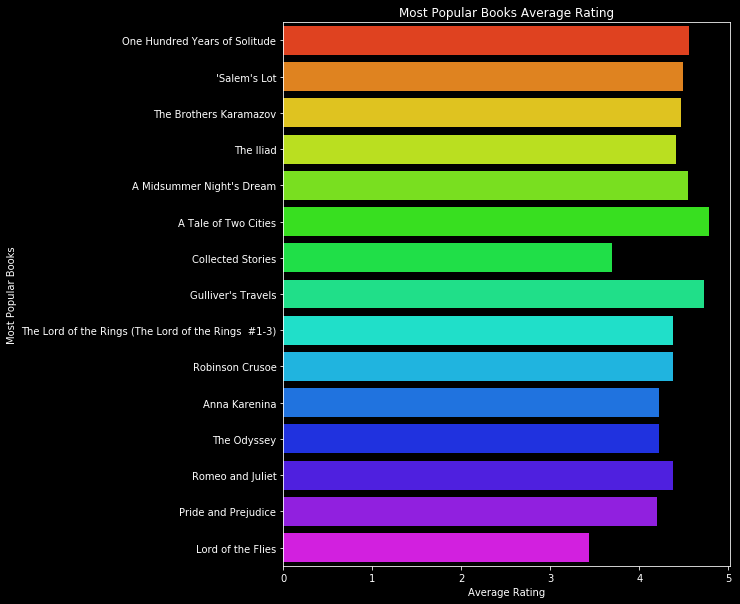

In [20]:
n = 15
plt.figure(figsize=(8,10))
books = df['title'].value_counts()[:n]
ratings = df.average_rating[:n]
sns.barplot(x=ratings, y=books.index, palette = 'gist_rainbow')
plt.xlabel('Average Rating')
plt.ylabel('Most Popular Books')
plt.title('Most Popular Books Average Rating')

Text(0.5, 1.0, 'Most Popular Authors Average Rating')

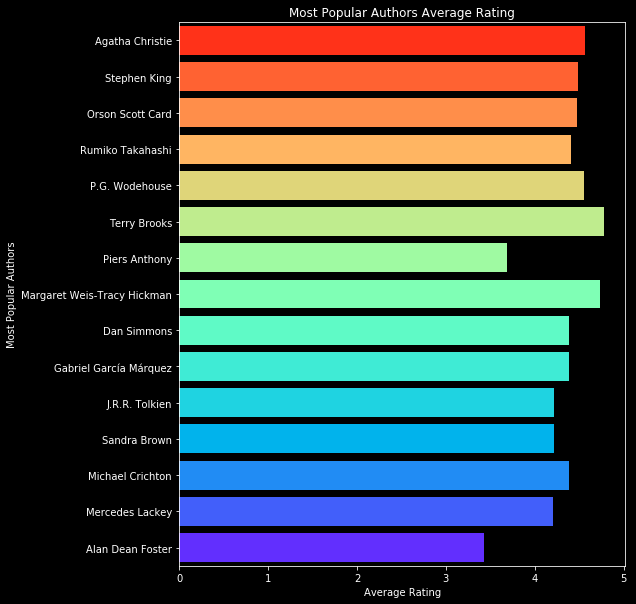

In [21]:
n = 15
plt.figure(figsize=(8,10))
books = df['authors'].value_counts()[:n]
ratings = df.average_rating[:n]
sns.barplot(x=ratings, y=books.index, palette = 'rainbow_r', saturation=10)
plt.xlabel('Average Rating')
plt.ylabel('Most Popular Authors')
plt.title('Most Popular Authors Average Rating')

In [22]:
df

bookID                                              title  \
bookID                                                              
1            1  Harry Potter and the Half-Blood Prince (Harry ...   
2            2  Harry Potter and the Order of the Phoenix (Har...   
3            3  Harry Potter and the Sorcerer's Stone (Harry P...   
4            4  Harry Potter and the Chamber of Secrets (Harry...   
5            5  Harry Potter and the Prisoner of Azkaban (Harr...   
...        ...                                                ...   
47699    47699                                     M Is for Magic   
47700    47700                                       Black Orchid   
47701    47701                        InterWorld (InterWorld  #1)   
47708    47708                                The Faeries' Oracle   
47709    47709                      The World of The Dark Crystal   

                              authors  average_rating        isbn  \
bookID                                                              
1          J.K. Rowling-Mary GrandPré            4.56  0439785960   
2          J.K. Rowling-Mary GrandPré            4.49  0439358078   
3          J.K. Rowling-Mary GrandPré            4.47  0439554934   
4                        J.K. Rowling            4.41  0439554896   
5          J.K. Rowling-Mary GrandPré            4.55  043965548X   
...                               ...             ...         ...   
47699   Neil Gaiman-Teddy Kristiansen            3.82  0061186422   
47700         Neil Gaiman-Dave McKean            3.72  0930289552   
47701      Neil Gaiman-Michael Reaves            3.53  0061238961   
47708     Brian Froud-Jessica Macbeth            4.43  0743201116   
47709                     Brian Froud            4.29  1862056242   

               isbn13 language_code  # num_pages  ratings_count  \
bookID                                                            
1       9780439785969           eng          652        1944099   
2       9780439358071           eng          870        1996446   
3       9780439554930           eng          320        5629932   
4       9780439554893           eng          352           6267   
5       9780439655484           eng          435        2149872   
...               ...           ...          ...            ...   
47699   9780061186424           eng          260          11317   
47700   9780930289553           eng          160           8710   
47701   9780061238963         en-US          239          14334   
47708   9780743201117           eng          224           1550   
47709   9781862056244           eng          132           3572   

        text_reviews_count Rating_Category  
bookID                                      
1                    26249      (4.0, 5.0]  
2                    27613      (4.0, 5.0]  
3                    70390      (4.0, 5.0]  
4                      272      (4.0, 5.0]  
5                    33964      (4.0, 5.0]  
...                    ...             ...  
47699                 1060      (3.0, 4.0]  
47700                  361      (3.0, 4.0]  
47701                 1485      (3.0, 4.0]  
47708                   38      (4.0, 5.0]  
47709                   33      (4.0, 5.0]  

[13714 rows x 11 columns]

In [23]:
df.dtypes

bookID                   int64
title                   object
authors                 object
average_rating         float64
isbn                    object
isbn13                   int64
language_code           object
# num_pages              int64
ratings_count            int64
text_reviews_count       int64
Rating_Category       category
dtype: object

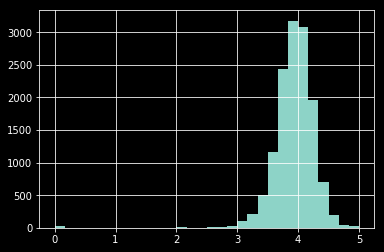

In [24]:
df['average_rating'].hist(bins=30)

Text(0.5, 1.0, 'Rating Distribution by Book Length')

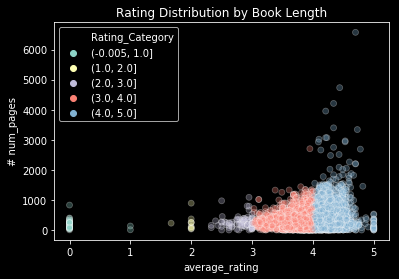

In [26]:
ax = sns.scatterplot(y="# num_pages", x="average_rating", data=df, alpha=.3, legend="brief", hue='Rating_Category')

plt.title('Rating Distribution by Book Length')